In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats

%matplotlib inline

![mlr](https://miro.medium.com/max/1280/1*lJKFo3yyZaFIx4ET1dLmlg.png)

# Multiple Linear Regression

# Objectives

- Use the one-hot strategy to encode categorical variables
- Conduct linear regressions in `statsmodels`
- Use standard scaling for linear regression for better  interpretation
- Conduct linear regressions in `sklearn`

# Regression with Multiple Predictors

> It's all a bunch of dials

<img width='450px' src='./images/dials.png'/>

The main idea here is pretty simple. Whereas, in simple linear regression we took our dependent variable to be a function only of a single independent variable, here we'll be taking the dependent variable to be a function of multiple independent variables.

## Expanding Simple Linear Regression

Our regression equation, then, instead of looking like $\hat{y} = mx + b$, will now look like:

$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1x_1 + ... + \hat{\beta}_nx_n$.

Remember that the hats ( $\hat{}$ ) indicate parameters that are estimated.

Is this still a best-fit *line*? Well, no. What does the graph of, say, z = x + y look like? [Here's](https://academo.org/demos/3d-surface-plotter/) a 3d-plotter. (Of course, once we get x's with subscripts beyond 2 it's going to be very hard to visualize. But in practice linear regressions can make use of dozens or even of hundreds of independent variables!)

# Confounding Variables

Suppose I have a simple linear regression that models the growth of corn plants as a function of the temperature of the ambient air. And suppose there is a noticeable positive correlation between temperature and plant height.

In [ ]:
corn = pd.read_csv('data/corn.csv',
                  usecols=['temp', 'humid', 'height'])

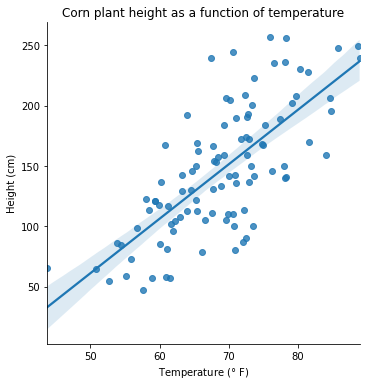

In [ ]:
sns.lmplot(data=corn, x='temp', y='height')
plt.xlabel('Temperature ($\degree$ F)')
plt.ylabel('Height (cm)')
plt.title('Corn plant height as a function of temperature');

In [ ]:
corn.head()

,temp,humid,height
0,58.086965,49.848304,122.222368
1,70.582087,22.855446,110.079666
2,75.868571,72.856834,256.812528
3,74.732376,38.907566,167.889601
4,77.384666,42.570524,188.914312


It seems that higher temperatures lead to taller corn plants. But it's hard to know for sure. One **confounding variable** might be *humidity*. If we haven't controlled for humidity, then it's difficult to draw conclusions.

One solution is to use **both features** in a single model.

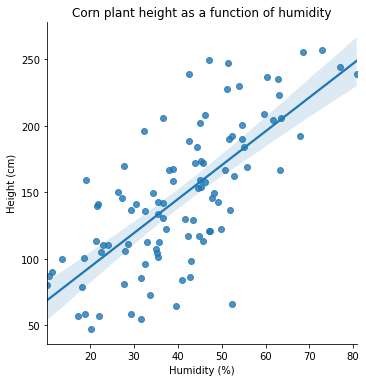

In [ ]:
sns.lmplot(data=corn, x='humid', y='height')
plt.xlabel('Humidity (%)')
plt.ylabel('Height (cm)')
plt.title('Corn plant height as a function of humidity');

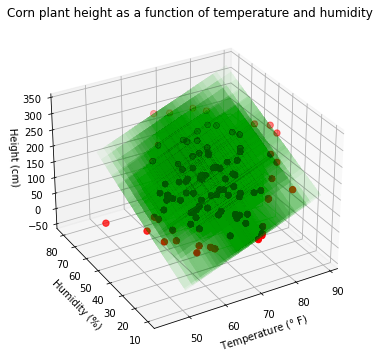

In [ ]:
ax = plt.figure(figsize=(8, 6)).add_subplot(111, projection='3d')
ax.scatter(corn['temp'], corn['humid'], corn['height'],
           depthshade=True, s=40, color='#ff0000')
# create x,y
xx, yy = np.meshgrid(corn['temp'], corn['humid'])

# calculate corresponding z
z = 4.3825 * xx + 2.4693 * yy - 255.5434

# plot the surface
ax.plot_surface(xx, yy, z, alpha=0.01, color='#00ff00')

ax.view_init(30, azim=240)
ax.set_xlabel('Temperature ($\degree$ F)')
ax.set_ylabel('Humidity (%)')
ax.set_zlabel('Height (cm)')
plt.title('Corn plant height as a function of temperature and humidity');

One risk we run when adding more predictors to a model is that their correlations with the target may be nearly *collinear* with each other. This can make it difficult to determine which predictor is doing the heavy lifting. We shall explore this theme of **multicollinearity** in more depth in due course.

# Dealing with Categorical Variables

One issue we'd like to resolve is what to do with categorical variables, i.e. variables that represent categories rather than continuous numerical values. In a Pandas DataFrame, these columns may well have strings or objects for values, but they need not. A certain heart-disease dataset from Kaggle, for example, has a target variable that takes values 0-4, each representing a different stage of heart disease.

## Dummying

One very effective way of dealing with categorical variables is to dummy them out. What this involves is making a new column for _each categorical value in the column we're dummying out_.

These new columns will be filled only with 0's and 1's, a 1 representing the presence of the relevant categorical value.

Let's look at a simple example:

In [ ]:
comma_use = pd.read_csv('data/comma-survey.csv')

For more on this dataset see [here](https://fivethirtyeight.com/features/elitist-superfluous-or-popular-we-polled-americans-on-the-oxford-comma/).

In [ ]:
comma_use.head()

,RespondentID,"In your opinion, which sentence is more gramatically correct?","Prior to reading about it above, had you heard of the serial (or Oxford) comma?","How much, if at all, do you care about the use (or lack thereof) of the serial (or Oxford) comma in grammar?",How would you write the following sentence?,"When faced with using the word ""data"", have you ever spent time considering if the word was a singular or plural noun?","How much, if at all, do you care about the debate over the use of the word ""data"" as a singluar or plural noun?","In your opinion, how important or unimportant is proper use of grammar?",Gender,Age,Household Income,Education,Location (Census Region)
0,3292953864,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",No,Not much,Somewhat important,Male,30-44,"$50,000 - $99,999",Bachelor degree,South Atlantic
1,3292950324,"It's important for a person to be honest, kind...",No,Not much,"Some experts say it's important to drink milk,...",No,Not much,Somewhat unimportant,Male,30-44,"$50,000 - $99,999",Graduate degree,Mountain
2,3292942669,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",Yes,Not at all,Very important,Male,30-44,NaN,NaN,East North Central
3,3292932796,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",No,Some,Somewhat important,Male,18-29,NaN,Less than high school degree,Middle Atlantic
4,3292932522,"It's important for a person to be honest, kind...",No,Not much,"Some experts say it's important to drink milk,...",No,Not much,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
comma_use['In your opinion, which sentence is more gramatically correct?'].value_counts()

It's important for a person to be honest, kind, and loyal.    641
It's important for a person to be honest, kind and loyal.     488
Name: In your opinion, which sentence is more gramatically correct?, dtype: int64

In [ ]:
comma_use.shape

(1129, 13)

In [ ]:
# two sum functions were used for 1.) the sum for each column, then 2.) sum across columns.
comma_use.isna().sum().sum()

924

In [ ]:
#drop all nan / null values 
comma_use.dropna(inplace=True)

In [ ]:
comma_use.shape

(825, 13)

In [ ]:
# Let's try using sklearn's OneHotEncoder to create our dummy columns:

ohe = OneHotEncoder(drop='first')
comma_trans = ohe.fit_transform(comma_use.drop('RespondentID', axis=1))

Could we have used ```pd.get_dummies()``` instead?

Well, yes. And in fact ```get_dummies()``` is in some ways easier; for one thing, it's built right into Pandas. But there are drawbacks with it as well. The main advantage of the `sklearn` tool is that it stores information about the columns and creates a persistent function that can be used on future data of the same form. See [this page](https://stackoverflow.com/questions/36631163/pandas-get-dummies-vs-sklearns-onehotencoder-what-are-the-pros-and-cons) for more.

In [ ]:
pd.get_dummies(comma_use.drop('RespondentID', axis=1))

,"In your opinion, which sentence is more gramatically correct?_It's important for a person to be honest, kind and loyal.","In your opinion, which sentence is more gramatically correct?_It's important for a person to be honest, kind, and loyal.","Prior to reading about it above, had you heard of the serial (or Oxford) comma?_No","Prior to reading about it above, had you heard of the serial (or Oxford) comma?_Yes","How much, if at all, do you care about the use (or lack thereof) of the serial (or Oxford) comma in grammar?_A lot","How much, if at all, do you care about the use (or lack thereof) of the serial (or Oxford) comma in grammar?_Not at all","How much, if at all, do you care about the use (or lack thereof) of the serial (or Oxford) comma in grammar?_Not much","How much, if at all, do you care about the use (or lack thereof) of the serial (or Oxford) comma in grammar?_Some","How would you write the following sentence?_Some experts say it's important to drink milk, but the data are inconclusive.","How would you write the following sentence?_Some experts say it's important to drink milk, but the data is inconclusive.",...,Education_Some college or Associate degree,Location (Census Region)_East North Central,Location (Census Region)_East South Central,Location (Census Region)_Middle Atlantic,Location (Census Region)_Mountain,Location (Census Region)_New England,Location (Census Region)_Pacific,Location (Census Region)_South Atlantic,Location (Census Region)_West North Central,Location (Census Region)_West South Central
0,1,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,0,1,1,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
6,0,1,0,1,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
7,0,1,0,1,1,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,0,1,0,1,1,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1125,1,0,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,1,0,0,0
1126,0,1,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1127,1,0,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


So what did the encoder do?

In [ ]:
comma_trans

<825x34 sparse matrix of type '<class 'numpy.float64'>'
	with 7174 stored elements in Compressed Sparse Row format>

In [ ]:
comma_trans.todense()

matrix([[0., 1., 0., ..., 1., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
ohe.get_feature_names()

array(["x0_It's important for a person to be honest, kind, and loyal.",
       'x1_Yes', 'x2_Not at all', 'x2_Not much', 'x2_Some',
       "x3_Some experts say it's important to drink milk, but the data is inconclusive.",
       'x4_Yes', 'x5_Not at all', 'x5_Not much', 'x5_Some',
       'x6_Somewhat important', 'x6_Somewhat unimportant',
       'x6_Very important', 'x6_Very unimportant', 'x7_Male', 'x8_30-44',
       'x8_45-60', 'x8_> 60', 'x9_$100,000 - $149,999', 'x9_$150,000+',
       'x9_$25,000 - $49,999', 'x9_$50,000 - $99,999',
       'x10_Graduate degree', 'x10_High school degree',
       'x10_Less than high school degree',
       'x10_Some college or Associate degree', 'x11_East South Central',
       'x11_Middle Atlantic', 'x11_Mountain', 'x11_New England',
       'x11_Pacific', 'x11_South Atlantic', 'x11_West North Central',
       'x11_West South Central'], dtype=object)

In [ ]:
comma_df = pd.DataFrame(comma_trans.todense(), columns=ohe.get_feature_names())
comma_df.head()

,"x0_It's important for a person to be honest, kind, and loyal.",x1_Yes,x2_Not at all,x2_Not much,x2_Some,"x3_Some experts say it's important to drink milk, but the data is inconclusive.",x4_Yes,x5_Not at all,x5_Not much,x5_Some,...,x10_Less than high school degree,x10_Some college or Associate degree,x11_East South Central,x11_Middle Atlantic,x11_Mountain,x11_New England,x11_Pacific,x11_South Atlantic,x11_West North Central,x11_West South Central
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Multiple Regression in `statsmodels`

Let's build a multiple regression with `statsmodels`. Let's start with a toy model:

In [ ]:
centers = np.arange(1, 6)
preds = np.array([stats.norm(loc=center, scale=3).rvs(200) for center in centers]).T
preds_df = pd.DataFrame(preds, columns=[f'var{center}' for center in centers])

target = preds_df['var1'] + 2*preds_df['var2'] + 3*preds_df['var3']\
    + 4*preds_df['var4'] + 5*preds_df['var5']
target_df = pd.DataFrame(target, columns=['target'])

In [ ]:
df = pd.concat([preds_df, target_df], axis=1)

df.head()

,var1,var2,var3,var4,var5,target
0,2.075901,1.092504,9.917764,-4.664552,10.284859,66.780287
1,-1.347241,3.595894,3.741422,3.230163,1.190902,35.943976
2,-1.939497,3.845795,2.301661,9.052304,10.182549,99.779036
3,-0.406681,3.220695,3.227490,3.518433,8.475734,72.169579
4,5.405042,0.470045,0.567276,8.845531,10.014722,93.502699


In [ ]:
# Assign your predictors and your target to two different variables in order to run the linear
# regression on this data. 

X = df.drop('target', axis=1)
y = df['target']

In [ ]:
model = sm.OLS(endog=y, exog=X).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.695e+32
Date:                Tue, 30 Aug 2022   Prob (F-statistic):                        0.00
Time:                        23:22:48   Log-Likelihood:                          5958.8
No. Observations:                 200   AIC:                                 -1.191e+04
Df Residuals:                     195   BIC:                                 -1.189e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
var1           1.0000   6.84e-16   1.46e+15      0.000       1.000       1.000
var2           2.0000   6.85e-16   2.92e+15      0.000       2.000       2.000
var3           3.0000   6.14e-16   4.89e+15      0.000       3.000       3.000
var4           4.0000   6.07e-16   6.58e+15      0.000       4.000       4.000
var5           5.0000   5.21e-16   9.59e+15      0.000       5.000       5.000
==============================================================================
Omnibus:                        0.029   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.986   Jarque-Bera (JB):                0.134
Skew:                           0.008   Prob(JB):                        0.935
Kurtosis:                       2.874   Cond. No.                         2.95
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Diamonds Dataset

In [ ]:
data = sns.load_dataset('diamonds').drop(['cut', 'color', 'clarity'], axis=1)

In [ ]:
data.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# assign your predictors to the X-variable and your target to the y-variable.
X = data.drop('price', axis=1)
y = data['price'] 

In [ ]:
model2 = sm.OLS(y, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                          1.120e+05
Date:                Tue, 30 Aug 2022   Prob (F-statistic):                        0.00
Time:                        23:22:50   Log-Likelihood:                     -4.7196e+05
No. Observations:               53940   AIC:                                  9.439e+05
Df Residuals:                   53934   BIC:                                  9.440e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       9533.9516     59.317    160.730      0.000    9417.691    9650.213
depth         28.2911      2.416     11.712      0.000      23.556      33.026
table        -18.8220      2.558     -7.358      0.000     -23.836     -13.808
x           -522.6300     40.351    -12.952      0.000    -601.718    -443.542
y            182.3295     25.907      7.038      0.000     131.552     233.107
z           -676.7502     42.361    -15.976      0.000    -759.778    -593.722
==============================================================================
Omnibus:                    14555.339   Durbin-Watson:                   1.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           287131.956
Skew:                           0.809   Prob(JB):                         0.00
Kurtosis:                      14.186   Cond. No.                         829.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

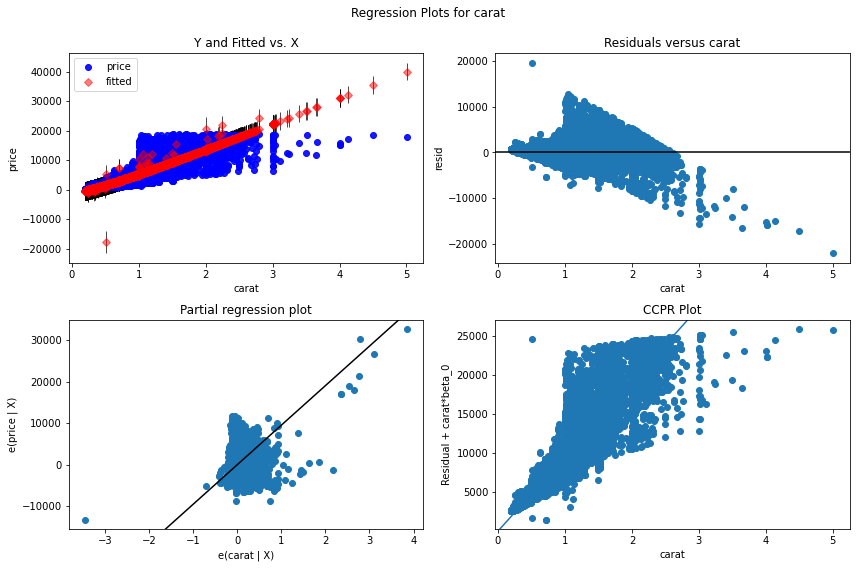

In [ ]:
sm.graphics.plot_regress_exog(model2, 'carat', fig=plt.figure(figsize=(12, 8)));

### Check distribution of target

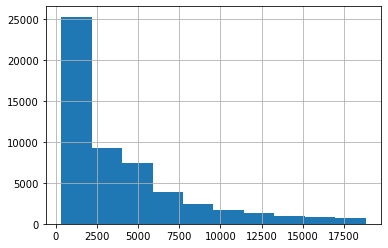

In [ ]:
# Lets check if our target variable is normally distributed...
y.hist();

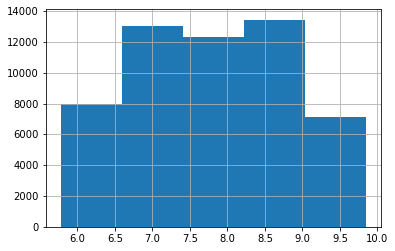

In [ ]:
# our data is logarithmically distributed... so lets take the logarithm of our y data to make it
# normal. 
y_scld = np.log(y)
y_scld.hist(bins=5);

### Build model with log-scaled target

In [ ]:
model3 = sm.OLS(y_scld, X).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          7.072e+06
Date:                Tue, 30 Aug 2022   Prob (F-statistic):                        0.00
Time:                        23:23:03   Log-Likelihood:                         -7833.4
No. Observations:               53940   AIC:                                  1.568e+04
Df Residuals:                   53934   BIC:                                  1.573e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat         -0.7522      0.011    -69.197      0.000      -0.774      -0.731
depth          0.0319      0.000     72.131      0.000       0.031       0.033
table         -0.0062      0.000    -13.212      0.000      -0.007      -0.005
x              1.1098      0.007    150.072      0.000       1.095       1.124
y              0.0506      0.005     10.660      0.000       0.041       0.060
z              0.0340      0.008      4.377      0.000       0.019       0.049
==============================================================================
Omnibus:                    50951.621   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         28055158.482
Skew:                           3.704   Prob(JB):                         0.00
Kurtosis:                     114.481   Cond. No.                         829.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

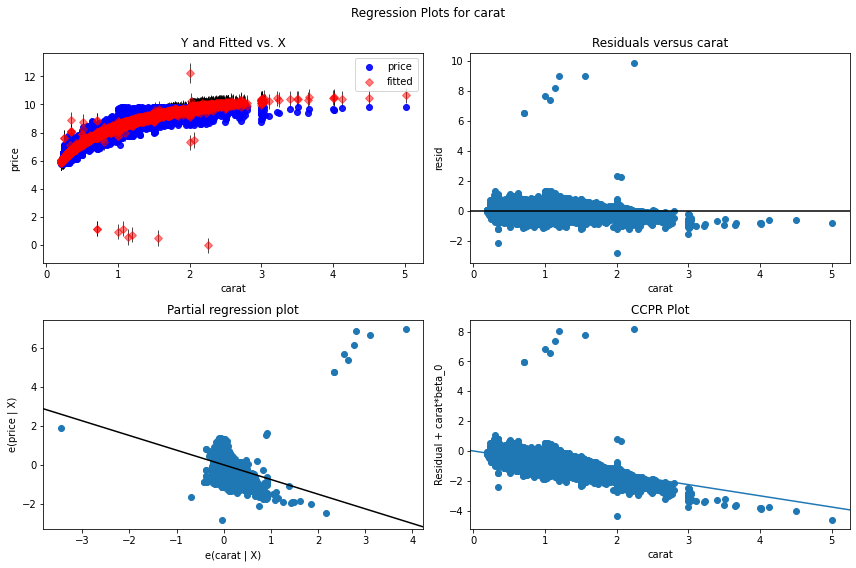

In [ ]:
sm.graphics.plot_regress_exog(model3, 'carat', fig=plt.figure(figsize=(12, 8)));

**Remember that $R^2$ can be negative!**

R2 compares the fit of the chosen model with that of a horizontal straight line (the null hypothesis). If the chosen model fits worse than a horizontal line, then R2 is negative.

In [ ]:
bad_pred = np.mean(y) * np.ones(len(y))
worse_pred = (np.mean(y) + 1000) * np.ones(len(y))

print(metrics.r2_score(y, bad_pred))
print(metrics.r2_score(y, worse_pred))

0.0
-0.06283248452205892


# Putting it in Practice: Wine Dataset 🍷

This dataset includes measurable attributes of different wines as well as their rated quality.

In [ ]:
wine = pd.read_csv('data/wine.csv')

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


Imagine we want to attempt to estimate the perceived quality of a wine using these attributes.

In [ ]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [ ]:
wine['red_wine'].value_counts()

0    4898
1    1599
Name: red_wine, dtype: int64

## 🧠 **Knowledge Check**

> Why are we using "quality" as the dependent variable (target)? Would it make sense for another feature to be the target instead?

## Running the Regression

First, we'll separate the data into our predictors (X) and target (y)

In [ ]:
wine_preds = wine.drop('quality', axis=1)
wine_target = wine['quality']
wine_preds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


Now we can perform our (multiple) linear regression! Since we already used `statsmodels`, let's use that again to fit the model and then check the summary:

In [ ]:
# use sm.add_constant() to add constant term/y-intercept
predictors = sm.add_constant(wine_preds)
predictors

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red_wine
0,1.0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,1.0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,1.0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,1.0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,1.0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1.0,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
6493,1.0,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
6494,1.0,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
6495,1.0,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0


In [ ]:
model = sm.OLS(wine_target, predictors).fit()

> All right! So we fitted our model! Take a look at the summary and look if you can understand the different parts.

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     227.8
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        23:23:15   Log-Likelihood:                -7195.2
No. Observations:                6497   AIC:                         1.442e+04
Df Residuals:                    6484   BIC:                         1.450e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  104.3904     14.105      7.401      0.000      76.741     132.040
fixed acidity            0.0851      0.016      5.396      0.000       0.054       0.116
volatile acidity        -1.4924      0.081    -18.345      0.000      -1.652      -1.333
citric acid             -0.0626      0.080     -0.786      0.432      -0.219       0.094
residual sugar           0.0624      0.006     10.522      0.000       0.051       0.074
chlorides               -0.7573      0.334     -2.264      0.024      -1.413      -0.102
free sulfur dioxide      0.0049      0.001      6.443      0.000       0.003       0.006
total sulfur dioxide    -0.0014      0.000     -4.333      0.000      -0.002      -0.001
density               -103.9096     14.336     -7.248      0.000    -132.013     -75.806
pH                       0.4988      0.091      5.506      0.000       0.321       0.676
sulphates                0.7217      0.076      9.466      0.000       0.572       0.871
alcohol                  0.2227      0.018     12.320      0.000       0.187       0.258
red_wine                 0.3613      0.057      6.367      0.000       0.250       0.473
==============================================================================
Omnibus:                      140.992   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.985
Skew:                           0.016   Prob(JB):                     6.59e-69
Kurtosis:                       4.077   Cond. No.                     2.96e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Scaling - The Missing & Helpful Step

When you looked at the summary after we did the linear regression, you might have noticed something interesting.

Observing the coefficients, you might notice there are two relatively large coefficients and nearly rest are less than 1.

## What's Going on Here?

In a word, it's useful to have all of our variables be on the same scale, so that the resulting coefficients are easier to interpret. If the scales of the variables are very different one from another, then some of the coefficients may end up on very large or very tiny scales.

This happens since the coefficients will effectively attempt to "shrink" or "expand" the features before factoring their importance to the model.

![](./images/shrinkinator.jpeg)

This can make it more difficult for interpretation and identifying coefficients with the most "effect" on the prediction.

For more on this, see [this post](https://stats.stackexchange.com/questions/32649/some-of-my-predictors-are-on-very-different-scales-do-i-need-to-transform-them).

## A Solution: Standard Scaling

One solution is to *scale* our features. There are a few ways to do this but we'll focus on **standard scaling**.

When we do **standard scaling**, we're really scaling it to be the features' respective $z$-scores.

Benefits:

- This tends to make values relatively small (mean value is at $0$ and one standard deviation $\sigma$ from the mean is $1$).
- Easier interpretation: larger coefficients tend to be more influential

Next time, let's *scale* our columns as $z$-scores first. 

##  Redoing with Standard Scaling

Let's try standard scaling the model with our wine dataset now.

In [ ]:
# We'll include all the columns for now.


wine_preds_scaled = (wine_preds - np.mean(wine_preds)) / np.std(wine_preds)

In [ ]:
wine_preds_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red_wine
count,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03
mean,1.014577e-14,-2.676336e-14,4.830012e-14,-2.203392e-15,1.208747e-14,1.714865e-15,-1.003020e-15,2.254710e-12,-3.333153e-14,-5.293322e-15,-1.200326e-14,1.064102e-14
std,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00
min,-2.634589e+00,-1.577330e+00,-2.192833e+00,-1.018034e+00,-1.342639e+00,-1.663583e+00,-1.941780e+00,-2.530192e+00,-3.100615e+00,-2.091935e+00,-2.089350e+00,-5.713666e-01
25%,-6.289329e-01,-6.661613e-01,-4.723335e-01,-7.657978e-01,-5.147986e-01,-7.620742e-01,-6.855323e-01,-7.859527e-01,-6.748622e-01,-6.805919e-01,-8.316152e-01,-5.713666e-01
50%,-1.660892e-01,-3.016939e-01,-5.941375e-02,-5.135612e-01,-2.578826e-01,-8.594301e-02,3.990667e-02,6.448888e-02,-5.287424e-02,-1.429373e-01,-1.608231e-01,-5.713666e-01
75%,3.738951e-01,3.664962e-01,4.911459e-01,5.584445e-01,2.559494e-01,5.901882e-01,7.122647e-01,7.648525e-01,6.313125e-01,4.619241e-01,6.776670e-01,-5.713666e-01
max,6.699425e+00,7.534354e+00,9.231281e+00,1.268682e+01,1.584219e+01,1.456357e+01,5.737257e+00,1.476879e+01,4.923029e+00,9.870879e+00,3.696231e+00,1.750190e+00


In [ ]:
predictors = sm.add_constant(wine_preds_scaled)
model = sm.OLS(wine_target, predictors).fit()
model.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     227.8
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        23:23:16   Log-Likelihood:                -7195.2
No. Observations:                6497   AIC:                         1.442e+04
Df Residuals:                    6484   BIC:                         1.450e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.8184      0.009    639.726      0.000       5.801       5.836
fixed acidity            0.1103      0.020      5.396      0.000       0.070       0.150
volatile acidity        -0.2457      0.013    -18.345      0.000      -0.272      -0.219
citric acid             -0.0091      0.012     -0.786      0.432      -0.032       0.014
residual sugar           0.2970      0.028     10.522      0.000       0.242       0.352
chlorides               -0.0265      0.012     -2.264      0.024      -0.049      -0.004
free sulfur dioxide      0.0876      0.014      6.443      0.000       0.061       0.114
total sulfur dioxide    -0.0793      0.018     -4.333      0.000      -0.115      -0.043
density                 -0.3116      0.043     -7.248      0.000      -0.396      -0.227
pH                       0.0802      0.015      5.506      0.000       0.052       0.109
sulphates                0.1074      0.011      9.466      0.000       0.085       0.130
alcohol                  0.2656      0.022     12.320      0.000       0.223       0.308
red_wine                 0.1556      0.024      6.367      0.000       0.108       0.204
==============================================================================
Omnibus:                      140.992   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.985
Skew:                           0.016   Prob(JB):                     6.59e-69
Kurtosis:                       4.077   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> Check how well this model did with the one before scaling. Does it perform any differently?

## 🧠 **Knowledge Check**

> After standard scaling, what would it mean when all the $x_i$ are all $0$?

## 🧠 **Knowledge Check**

### Follow-Up

> What does this mean for the constant term $\hat{\beta}_0$? Could we check this?

In [ ]:
wine_target.mean()

5.818377712790519

# Multiple Regression in Scikit-Learn

> It's great that we tried out multiple linear regression with `statsmodels`; now let's try it with `sklearn`!

## Scale the Data

In [ ]:
# Let's create a StandardScaler object to scale our data for us.
ss = StandardScaler()

In [ ]:
# Now we'll apply it to our data by using the .fit() and .transform() methods.
ss.fit(wine_preds)

wine_preds_st_scaled = ss.transform(wine_preds)

In [ ]:
wine_preds_st_scaled

array([[ 0.14247327,  2.18883292, -2.19283252, ...,  0.19309677,
        -0.91546416,  1.75018984],
       [ 0.45103572,  3.28223494, -2.19283252, ...,  0.99957862,
        -0.58006813,  1.75018984],
       [ 0.45103572,  2.55330026, -1.91755268, ...,  0.79795816,
        -0.58006813,  1.75018984],
       ...,
       [-0.55179227, -0.6054167 , -0.88525328, ..., -0.47897144,
        -0.91546416, -0.57136659],
       [-1.32319841, -0.30169391, -0.12823371, ..., -1.016626  ,
         1.9354021 , -0.57136659],
       [-0.93749534, -0.78765037,  0.42232597, ..., -1.41986693,
         1.09691202, -0.57136659]])

In [ ]:
# Check that the scaling worked about the same as when we did it by hand
np.allclose(wine_preds_st_scaled, wine_preds_scaled)

True

In [ ]:
wine_preds_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red_wine
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,1.75019
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,1.75019
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,1.75019
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,1.75019
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,1.75019


In [ ]:
wine_preds_st_scaled[:5, :]

array([[ 0.14247327,  2.18883292, -2.19283252, -0.7447781 ,  0.56995782,
        -1.10013986, -1.44635852,  1.03499282,  1.81308951,  0.19309677,
        -0.91546416,  1.75018984],
       [ 0.45103572,  3.28223494, -2.19283252, -0.59764007,  1.1979747 ,
        -0.31132009, -0.86246863,  0.70148631, -0.11507303,  0.99957862,
        -0.58006813,  1.75018984],
       [ 0.45103572,  2.55330026, -1.91755268, -0.66069923,  1.02669737,
        -0.87476278, -1.09248586,  0.76818761,  0.25811972,  0.79795816,
        -0.58006813,  1.75018984],
       [ 3.07381662, -0.36243847,  1.66108525, -0.7447781 ,  0.54141159,
        -0.76207424, -0.98632406,  1.10169412, -0.3638682 ,  0.32751041,
        -0.58006813,  1.75018984],
       [ 0.14247327,  2.18883292, -2.19283252, -0.7447781 ,  0.56995782,
        -1.10013986, -1.44635852,  1.03499282,  1.81308951,  0.19309677,
        -0.91546416,  1.75018984]])

## Fit the Model

Now we can fit a `LinearRegression` object to our training data!

In [ ]:
# Now we can fit a LinearRegression object to our training data!

lr = LinearRegression()
lr.fit(wine_preds_st_scaled, wine_target)

LinearRegression()

In [ ]:
# We can use the .coef_ attribute to recover the results
# of the regression.

lr.coef_

array([ 0.11027401, -0.24568548, -0.00909927,  0.29704168, -0.02652718,
        0.08762284, -0.07927578, -0.311567  ,  0.08018737,  0.10739154,
        0.26556038,  0.155642  ])

In [ ]:
lr.intercept_

5.818377712790517

In [ ]:
lr2 = LinearRegression()

In [ ]:
lr2.intercept_

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [ ]:
lr.score(wine_preds_st_scaled, wine_target)

In [ ]:
y_hat = lr.predict(wine_preds_st_scaled)
y_hat

All that's left is to evaluate our model to see how well it did!

## Evaluate Performance

### Observing Residuals

We can check the residuals like we would for a simple linear regression model.

In [ ]:
y_hat = lr.predict(wine_preds_st_scaled)
resid = (wine_target - y_hat)

fig, ax = plt.subplots()
ax.scatter(x=range(y_hat.shape[0]),y=resid, alpha=0.1);

### Sklearn Metrics

The metrics module in sklearn has a number of metrics that we can use to measure the accuracy of our model, including the $R^2$ score, the mean absolute error and the mean squared error. Note that the default 'score' on our model object is the $R^2$ score. Let's go back to our wine dataset:

In [ ]:
metrics.r2_score(wine_target, lr.predict(wine_preds_st_scaled))

Let's make sure this metric is properly calibrated. If we put simply $\bar{y}$ as our prediction, then we should get an $R^2$ score of *0*. And if we predict, say, $\bar{y} + 1$, then we should get a *negative* $R^2$ score.

In [ ]:
avg_quality = np.mean(wine_target)
num = len(wine_target)

metrics.r2_score(wine_target, avg_quality * np.ones(num))

In [ ]:
metrics.r2_score(wine_target, (avg_quality + 1) * np.ones(num))

In [ ]:
metrics.mean_absolute_error(wine_target, lr.predict(wine_preds_st_scaled))

In [ ]:
metrics.mean_squared_error(wine_target, lr.predict(wine_preds_st_scaled))

# Level Up: Deeper Evaluation of Wine Data Predictions

One thing we could have investigated from our [model on the Wine Data](#Multiple-Regression-in-Scikit-Learn) is how our predictions $\hat{y}$ match with the actual target values.

In [ ]:
sns.histplot(y_hat,kde=True,fill=False,stat='density',color='red')
sns.histplot(wine_target,discrete=True,stat='density')

So there's a slight issue with our model; the linear regression believes the target values are on a continuum. We know that's not true from the data. 

An easy fix is to round the target values.

In [ ]:
y_hat_rounded = np.round(y_hat)
np.unique(y_hat_rounded, return_counts=True)

Plotting the distribution is a lot more meaningful if we require targets to be integers.

In [ ]:
sns.histplot(np.round(y_hat),fill=False,discrete=True,stat='density',color='red')
sns.histplot(wine_target,discrete=True,alpha=0.3,stat='density')

Note that our $R^2$ metric will be worse. This makes sense since we found a "line of best fit" that predicts continuous values. 

If the better option was _integer_ predictions, it would have predicted that instead. 

In [ ]:
metrics.r2_score(wine_target, y_hat_rounded)

You must decide yourself if this is worth doing or if a different model makes more sense (we'll see more models in future lectures).

# Level Up: Regression with Categorical Features with the Comma Dataset

In [ ]:
comma_df.columns

In [ ]:
# We'll try to predict the first column of df: the extent to which
# the person accepts the sentence
# without the Oxford comma as more grammatically correct.

comma_target = comma_df['x0_It\'s important for a person to be honest, kind, and loyal.']

comma_predictors = comma_df[['x8_30-44',
       'x8_45-60', 'x8_> 60', 'x9_$100,000 - $149,999',
       'x9_$150,000+', 'x9_$25,000 - $49,999', 'x9_$50,000 - $99,999']]

comma_lr = LinearRegression()

comma_lr.fit(comma_predictors, comma_target)

In [ ]:
comma_lr.score(comma_predictors, comma_target)

In [ ]:
metrics.mean_squared_error(wine_target, y_hat_rounded)

In [ ]:
comma_lr.coef_

In [ ]:
comma_df.corr()['x0_It\'s important for a person to be honest, kind, and loyal.']

For more on the interpretation of regression coefficients for categorical variables, see [Erin's repo](https://github.com/hoffm386/coefficients-of-dropped-categorical-variables).